# Task 2

In [1]:

from keras.models import Model

from random import seed
from random import random
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np



2023-08-05 13:30:07.622700: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
#import Datasets

fashion_mnist = tf.keras.datasets.fashion_mnist
mnist=tf.keras.datasets.mnist


In [11]:
#load datasets
(digit_train_images, digit_train_labels), (digit_test_images, digit_test_labels) = mnist.load_data()
(fashion_train_images, fashion_train_labels), (fashion_test_images, fashion_test_labels) = fashion_mnist.load_data()


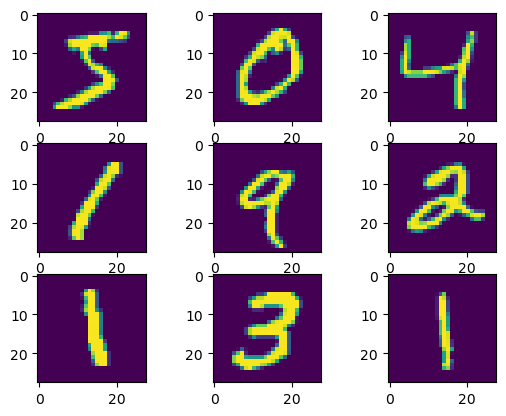

In [12]:
#MNIST Dataset

for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(digit_train_images[i])
pyplot.show()


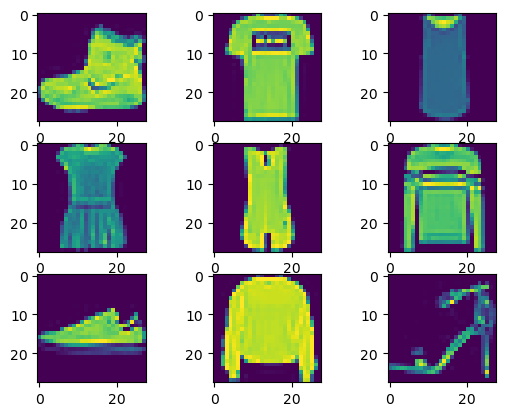

In [13]:
#Fasion MNIST dataset

for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(fashion_train_images[i])
pyplot.show()

In [14]:
#Normalising the data

digit_train_images=digit_train_images.reshape(60000, 28, 28, 1)
digit_test_images=digit_test_images.reshape(10000, 28, 28, 1)
digit_train_images=digit_train_images/255.0
digit_test_images=digit_test_images/255.0

fashion_test_images=fashion_test_images.reshape(10000, 28, 28, 1)
fashion_train_images=fashion_train_images.reshape(60000, 28, 28, 1)
fashion_train_images=fashion_train_images/255.0
fashion_test_images=fashion_test_images/255.0


In [15]:
#defining the model
def get_model():
    model = Sequential()
    model.add(Conv2D(6, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(12, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

In [35]:
def get_MC_predictions(test_data, model):
    predicitons=np.stack([model(test_data, training=True) for i in range(100)])
    prediction=predicitons.mean(axis=0)
    return prediction

In [19]:
#hyperparameters for the model

epochs=[5,10,15,20,25]
steps_per_epoch=[1,10,100,200]
learning_rates=[0.001,0.01,0.1,0.3]
parameters=[]
models=[]
accuracies=[]

# making a validation set of last `10000` images
for num_epochs in epochs:
    for steps in steps_per_epoch:
        for learning_rate in learning_rates:
            model=get_model()
            model.compile(optimizer=Adam(learning_rate=learning_rate),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
            model.fit(digit_train_images[:50000], digit_train_labels[:50000], epochs=num_epochs, steps_per_epoch=steps, verbose=1)
            parameters.append((num_epochs,steps,learning_rate))
            models.append(model)
            accuracy=model.evaluate(digit_train_images[50000:],digit_train_labels[50000:])
            accuracies.append(accuracy)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 3.1864 - accuracy: 0.0973
Epoch 2/5
1/1 [==============================] - 4s 4s/step - loss: 2.8208 - accuracy: 0.1062
Epoch 3/5
1/1 [==============================] - 4s 4s/step - loss: 2.6379 - accuracy: 0.1200
Epoch 4/5
1/1 [==============================] - 4s 4s/step - loss: 2.5285 - accuracy: 0.1366
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 2.0540 - accuracy: 0.2795
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 2.5466 - accuracy: 0.1036
Epoch 2/5
1/1 [==============================] - 4s 4s/step - loss: 2.2765 - accuracy: 0.1543
Epoch 3/5
1/1 [==============================] - 4s 4s/step - loss: 2.1277 - accuracy: 0.2735
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 2.0044 - accuracy: 0.3542
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.6733 - accuracy: 0.5336
Epoch 1/5
1/1 [==============================] - 4

In [31]:
final_accuracies=[i[1] for i in accuracies]
best_model=np.argmax(final_accuracies)
print(best_model)
print("accuracy: ", final_accuracies[best_model])
print("parameters: ",parameters[best_model])
model=models[best_model]
model.save('final_model.h5')
print("saved model")

76
accuracy:  0.9894000291824341
parameters:  (25, 200, 0.001)
saved model


In [37]:
#performance evaluation in comparison to dropout

#without MC dropout
scores=model.evaluate(digit_test_images, digit_test_labels)
print("Accuracy without MC dropout: %f%%" % (scores[1]*100))

#with MC dropout
predictions=get_MC_predictions(digit_test_images, model)
outputs=np.argmax(predictions,axis=1)
accuracy=sum(outputs==digit_test_labels)/len(digit_test_labels)
print("Accuracy with MC dropout: %f%%" % (accuracy*100))



313/313 [==============================] - 1s 2ms/step - loss: 0.0338 - accuracy: 0.9888
Accuracy without MC dropout: 98.879999%
Accuracy with MC dropout: 98.910000%


## Part a.

In [38]:
#removing the last layer of the model
model_new=Sequential(model.layers[:-1])
print(model_new.summary())

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_158 (Conv2D)         (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_158 (MaxPooli  (None, 13, 13, 6)        0         
 ng2D)                                                           
                                                                 
 dropout_237 (Dropout)       (None, 13, 13, 6)         0         
                                                                 
 conv2d_159 (Conv2D)         (None, 11, 11, 12)        660       
                                                                 
 max_pooling2d_159 (MaxPooli  (None, 5, 5, 12)         0         
 ng2D)                                                           
                                                                 
 dropout_238 (Dropout)       (None, 5, 5, 12)        

In [39]:
digits_dense_layer_outputs=model_new(digit_test_images, training=False)
fashion_dense_layer_outputs=model_new(fashion_test_images, training=False)

In [40]:
#TSNE plot
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

/Users/bhaveshjain/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/bhaveshjain/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


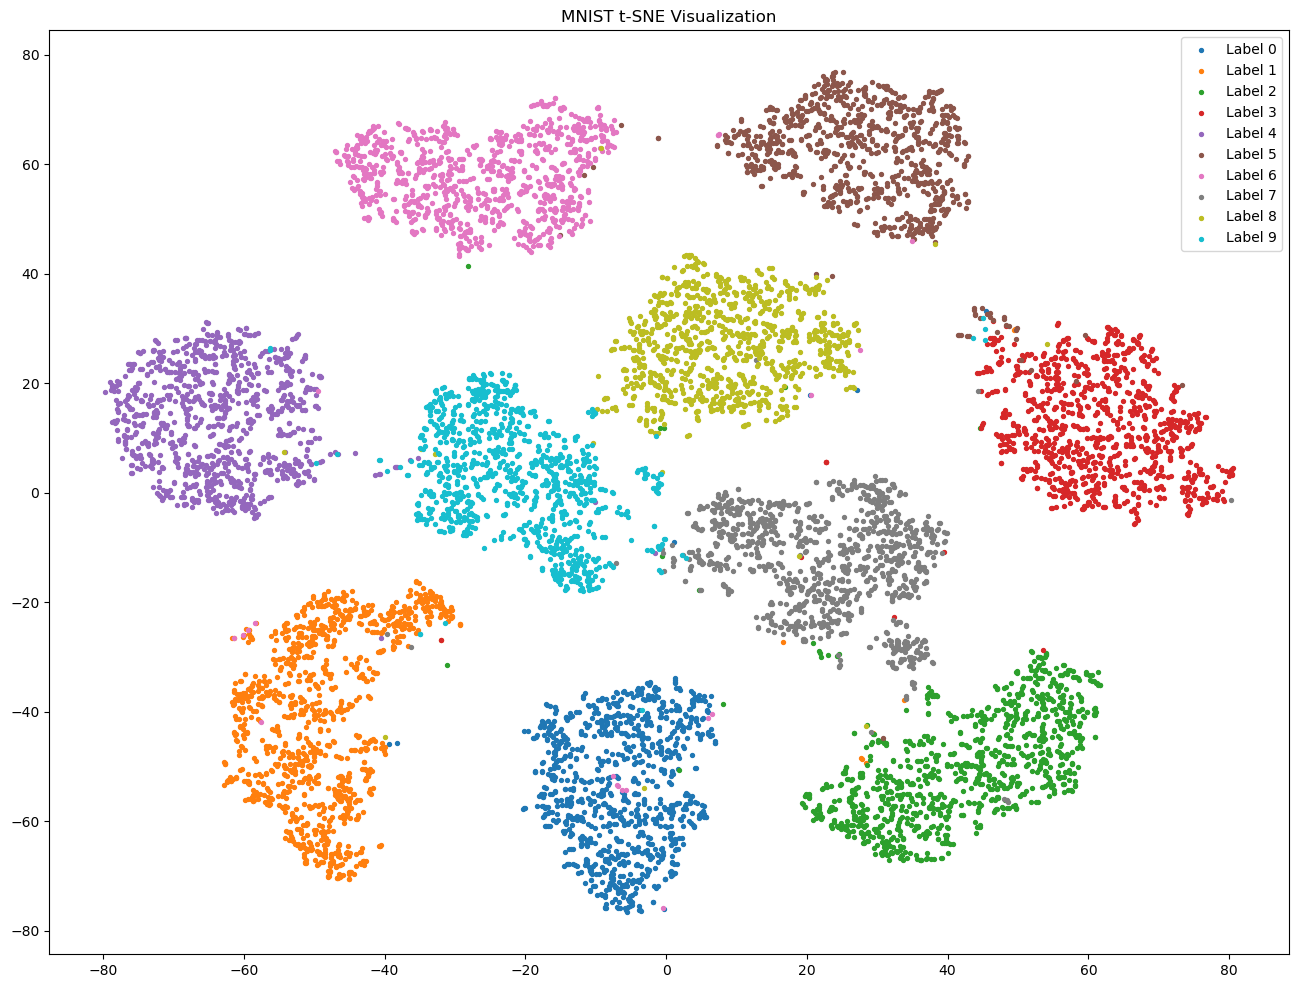

In [41]:
tsne = TSNE(n_components=2)
data_digits = tsne.fit_transform(digits_dense_layer_outputs)

# Create a color map for the labels
color_map = plt.cm.get_cmap('tab10')
labels=digit_test_labels

# Plot the 2D t-SNE visualization with multiple colors for different labels
plt.figure(figsize=(16, 12))
for i in range(10):  
    plt.scatter(data_digits[labels == i, 0], data_digits[labels == i, 1], marker='o', s=8, cmap=color_map, label=f'Label {i}')

plt.title('MNIST t-SNE Visualization')
plt.legend()
plt.show()

## Part b.

### Without using MC Dropout

#### Fashion Images

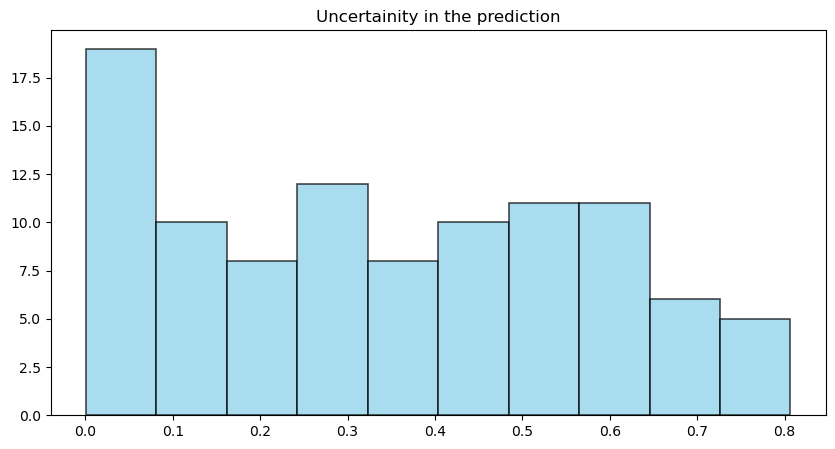

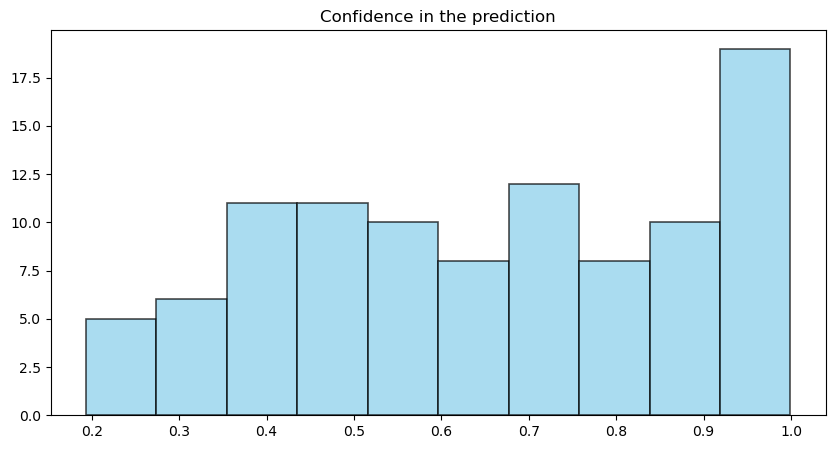

In [64]:

#take random sample of 100 images from fasion test dataset
sample_fashion_images=fashion_test_images[:100]
probabilities=model(sample_fashion_images, training=False)

#uncertainity in the prediction(1-confidence)
confidence = np.amax(probabilities, axis=1)
uncertainity = 1-confidence
#plot bar graph of uncertainity and condifence with 10 intervals from 0 to 1
plt.figure(figsize=(10, 5))
plt.title('Uncertainity in the prediction')
plt.hist(uncertainity, bins=10,alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Confidence in the prediction')
plt.hist(confidence, bins=10,alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
plt.show()


#### Digit Images

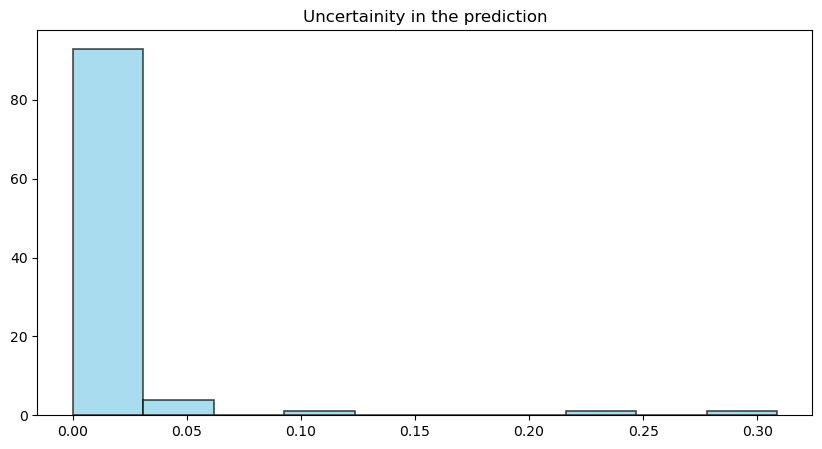

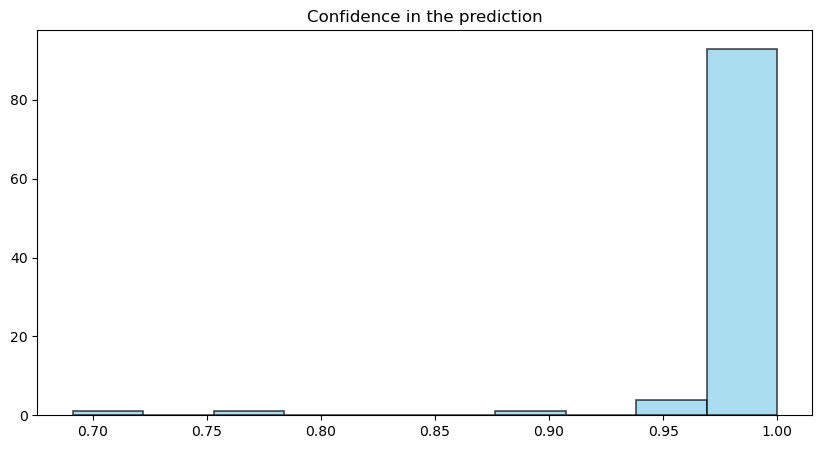

In [68]:
#take random sample of 100 images from digit test dataset

sample_digit_images=digit_test_images[:100]
probabilities=model(sample_digit_images, training=False)

#uncertainity in the prediction(1-confidence)
confidence = np.amax(probabilities, axis=1)
uncertainity = 1-confidence
#plot bar graph of uncertainity and condifence with 10 intervals from 0 to 1
plt.figure(figsize=(10, 5))
plt.title('Uncertainity in the prediction')
plt.hist(uncertainity, bins=10,alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Confidence in the prediction')
plt.hist(confidence, bins=10,alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
plt.show()


### Using MC Droput

#### Fashion Images

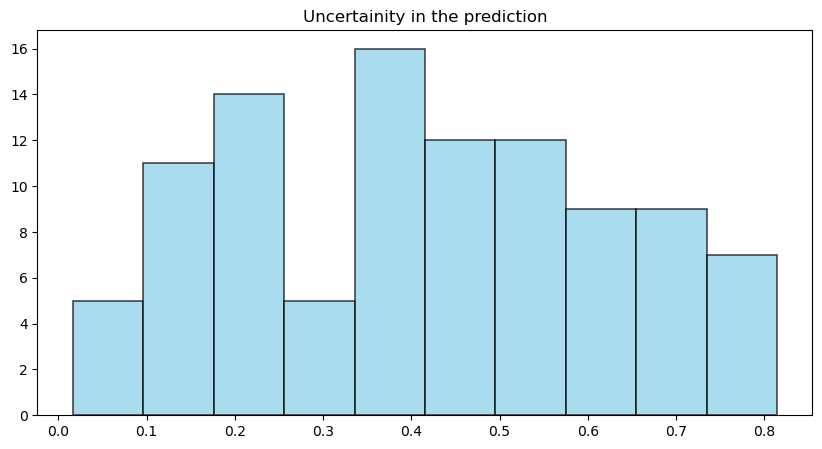

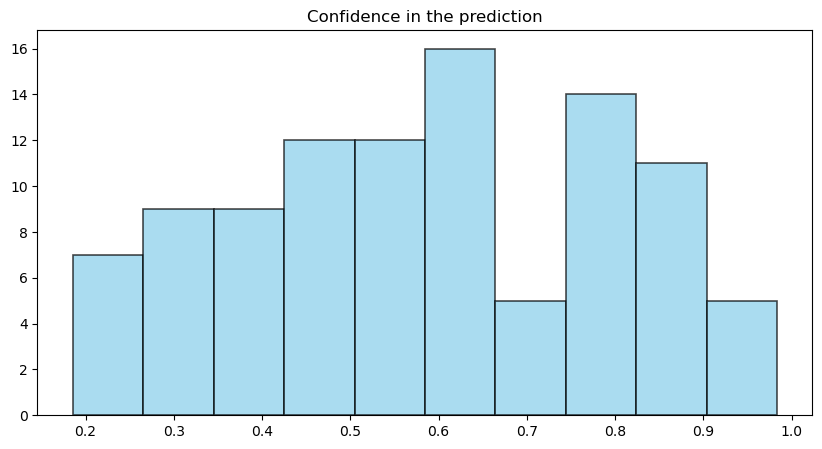

In [69]:
#take random sample of 100 images from fashion test dataset
sample_fashion_images=fashion_test_images[:100]
probabilities=get_MC_predictions(sample_fashion_images, model)

#uncertainity in the prediction(1-confidence)
confidence = np.amax(probabilities, axis=1)
uncertainity = 1-confidence
#plot bar graph of uncertainity and condifence with 10 intervals from 0 to 1
plt.figure(figsize=(10, 5))
plt.title('Uncertainity in the prediction')
plt.hist(uncertainity, bins=10,alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Confidence in the prediction')
plt.hist(confidence, bins=10,alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
plt.show()

#### Digit Images

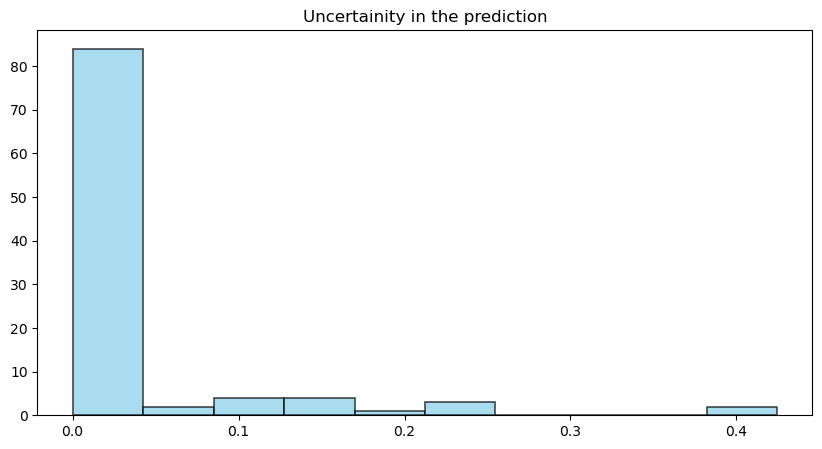

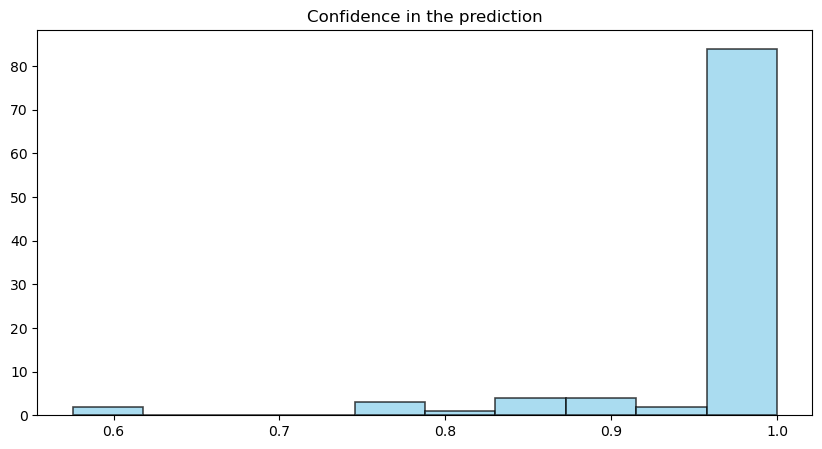

In [70]:
#take random sample of 100 images from digit test dataset

sample_digit_images=digit_test_images[:100]
probabilities=get_MC_predictions(sample_digit_images, model)

#uncertainity in the prediction(1-confidence)
confidence = np.amax(probabilities, axis=1)
uncertainity = 1-confidence
#plot bar graph of uncertainity and condifence with 10 intervals from 0 to 1
plt.figure(figsize=(10, 5))
plt.title('Uncertainity in the prediction')
plt.hist(uncertainity, bins=10,alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Confidence in the prediction')
plt.hist(confidence, bins=10,alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
plt.show()

# Part c.

/Users/bhaveshjain/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/bhaveshjain/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/bhaveshjain/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/bhaveshjain/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


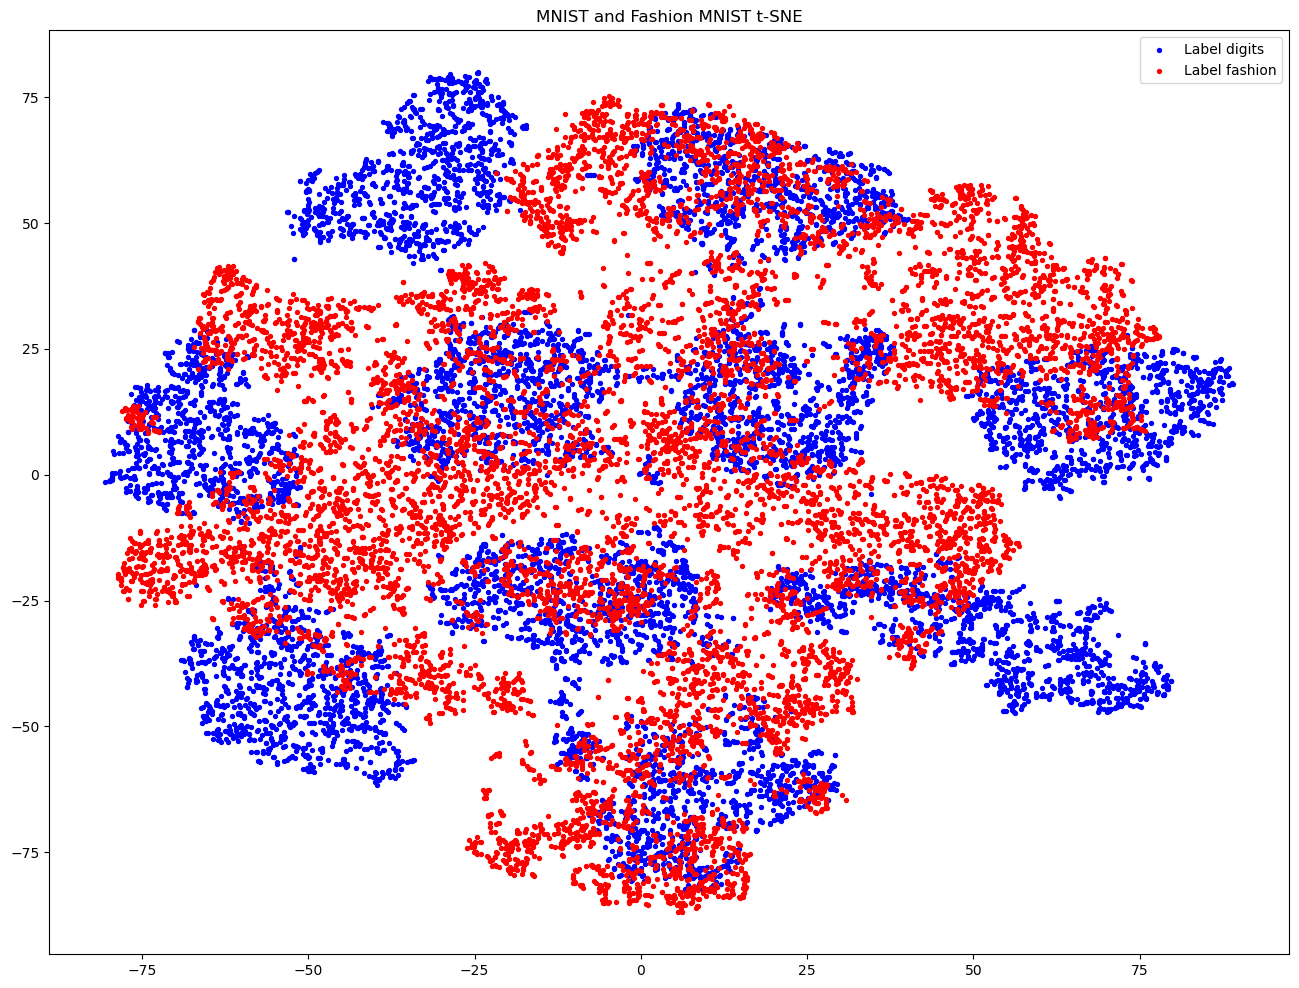

In [42]:
#without using MC droupout
tsne = TSNE(n_components=2)
data_digits = tsne.fit_transform(digits_dense_layer_outputs)
data_fashion = tsne.fit_transform(fashion_dense_layer_outputs)
plt.figure(figsize=(16, 12))
plt.scatter(data_digits[:, 0], data_digits[:, 1], marker='o', s=8, color='blue', label=f'Label digits')
plt.scatter(data_fashion[:, 0], data_fashion[:, 1], marker='o', s=8, color='red', label=f'Label fashion')

plt.title('MNIST and Fashion MNIST t-SNE')
plt.legend()
plt.show()

In [43]:
#using MC Dropout 
digits_dense_layer_outputs_mc=get_MC_predictions(digit_test_images, model_new)
fashion_dense_layer_outputs_mc=get_MC_predictions(fashion_test_images, model_new)

/Users/bhaveshjain/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/bhaveshjain/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/bhaveshjain/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/bhaveshjain/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


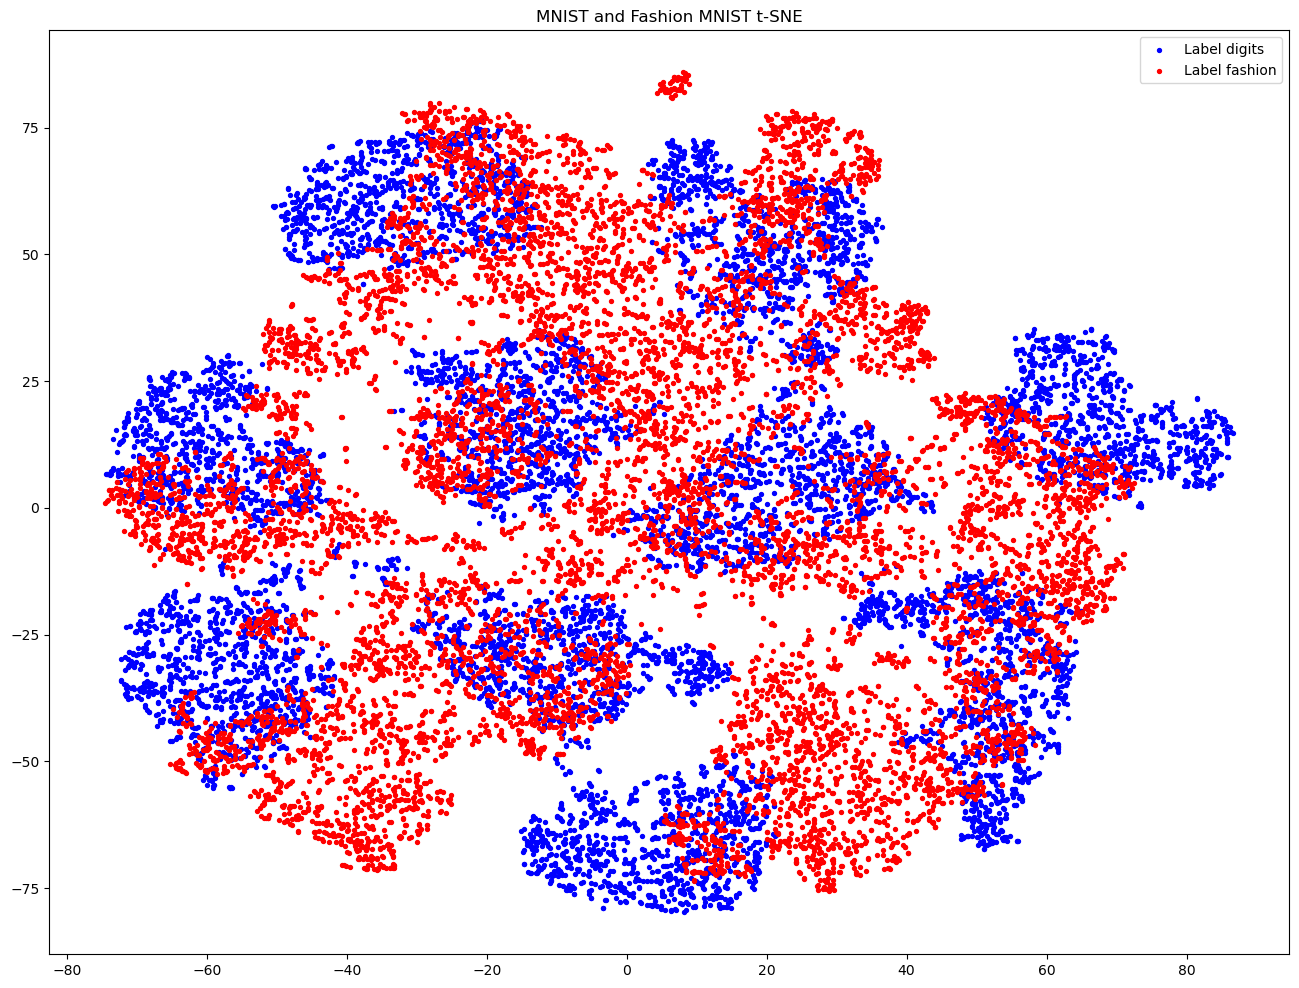

In [44]:
data_digits_mc = tsne.fit_transform(digits_dense_layer_outputs_mc)
data_fashion_mc = tsne.fit_transform(fashion_dense_layer_outputs_mc)
plt.figure(figsize=(16, 12))
plt.scatter(data_digits_mc[:, 0], data_digits_mc[:, 1], marker='o', s=8, color='blue', label=f'Label digits')
plt.scatter(data_fashion_mc[:, 0], data_fashion_mc[:, 1], marker='o', s=8, color='red', label=f'Label fashion')

plt.title('MNIST and Fashion MNIST t-SNE')
plt.legend()
plt.show()